In [20]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'errorbar.capsize': 2})

In [21]:
# Define the file to explore
file='resumen_N100_Niter10000000_beta1.0_dt1e-07_lf1.0_stf50_Nsimstot1044_mul10.csv'

# Define the parameters for the simulation
N=100
beta=1.0
s=1.0
nu=-1/(beta+1)

# Import the data file
df=pd.read_csv(file, engine='python')
print(df.columns.tolist())
print('Theoretical exponent (nu)= %g'%nu)

['t', 'log_t', 'N_avg', 'std_N', 'log_N']
Theoretical exponent (nu)= -0.5


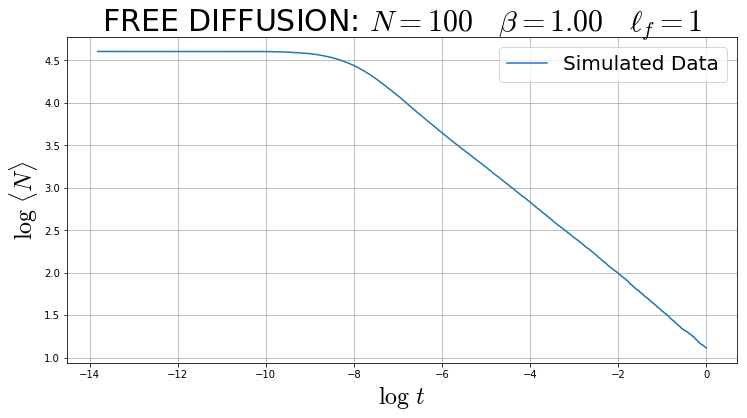

In [29]:
# Plot the entire log-data 
plt.figure(figsize=(12,6))

plt.plot(df.log_t,df.log_N, label='Simulated Data')

plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.title(r'FREE DIFFUSION: $N=%i \quad \beta=%.2f \quad \ell_f=%g$'%(N,beta,s),fontsize=30)
plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()

In [23]:
# Cut the data in order to analyze the last part
# The cut-value can be changed and will change the results
cut=-5
cut2=-1
df_tail=df[(df['log_t']>cut) & (df['log_t']<cut2)]

# LINEAR REGRESSION FOR MEAN VALUE

In [24]:
# Perform the linear regression for the asymptotic behaviour of the mean values
X=df_tail['log_t']
y=df_tail['log_N']

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()
nu_res=results.params[1]

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_N   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.107e+09
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        13:17:36   Log-Likelihood:             1.3092e+06
No. Observations:              361142   AIC:                        -2.618e+06
Df Residuals:                  361140   BIC:                        -2.618e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1278    2.7e-05   4.18e+04      0.0

## LINEAR REGRESSION FOR UPPER BOUND

In [25]:
# Perform the linear regression for the upper bound of the data
X=df_tail['log_t']
y=np.log(df_tail['N_avg']+df_tail['std_N'])

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.867e+09
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        13:17:36   Log-Likelihood:             1.4379e+06
No. Observations:              361142   AIC:                        -2.876e+06
Df Residuals:                  361140   BIC:                        -2.876e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4420   1.89e-05   7.63e+04      0.0

## LINEAR REGRESSION FOR LOWER BOUND

In [26]:
# Perform the linear regression for the lower bound of the data
X=df_tail['log_t']
y=np.log(df_tail['N_avg']-df_tail['std_N'])

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.442e+08
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        13:17:36   Log-Likelihood:             9.8550e+05
No. Observations:              361142   AIC:                        -1.971e+06
Df Residuals:                  361140   BIC:                        -1.971e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6847   6.61e-05   1.04e+04      0.0

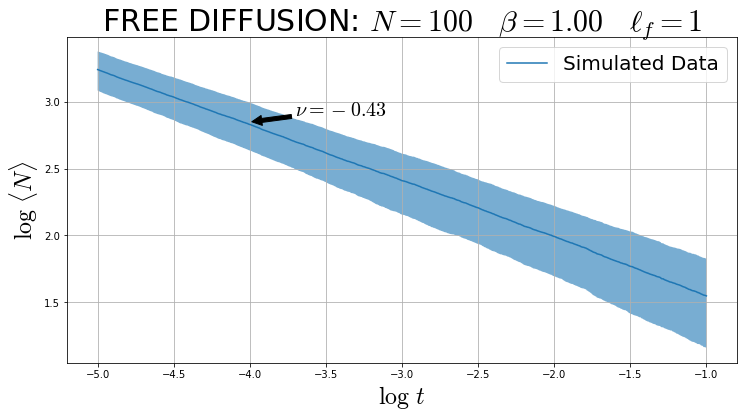

In [27]:
# Plot the partial data with the theoretical behaviour 
plt.figure(figsize=(12,6))

plt.plot(df_tail.log_t,df_tail.log_N,label='Simulated Data')

upper=np.log(df_tail['N_avg']+df_tail['std_N'])
lower=np.log(df_tail['N_avg']-df_tail['std_N'])
plt.fill_between(df_tail.log_t,upper,lower,alpha=0.6)
plt.annotate(r'$\nu=%.2f$'%nu_res, 
             xy=(-4.0, 2.85),
             xytext=(-3.7,2.9),
             xycoords='data',
             arrowprops=dict(arrowstyle="simple",facecolor='black'),
             fontsize=20)


plt.title(r'FREE DIFFUSION: $N=%i \quad \beta=%.2f \quad \ell_f=%g$'%(N,beta,s),fontsize=30)
plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()

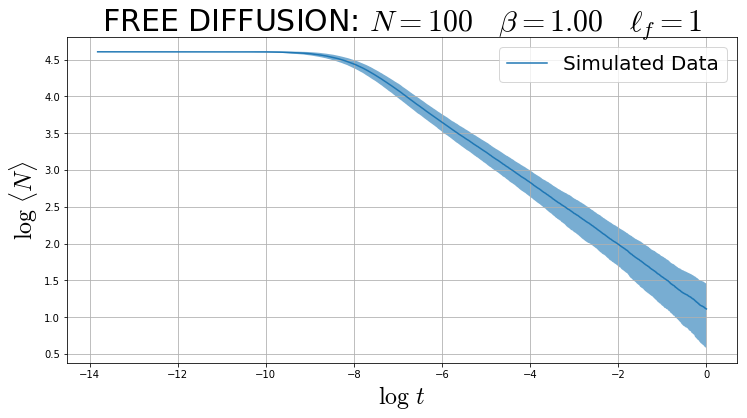

In [28]:
plt.figure(figsize=(12,6))

plt.plot(df.log_t,df.log_N,label='Simulated Data')

upper=np.log(df['N_avg']+df['std_N'])
lower=np.log(df['N_avg']-df['std_N'])
plt.fill_between(df.log_t,upper,lower,alpha=0.6)

plt.title(r'FREE DIFFUSION: $N=%i \quad \beta=%.2f \quad \ell_f=%g$'%(N,beta,s),fontsize=30)
plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()